In [1]:
import numpy as np
import networkx as nx
import osmnx as ox

# Simplifying Street Networks

For my purposes, I simplify the street networks gathered by OSMnx to eliminate unnecessary or extra information when calculating the motif occurences. Namely, we need to process the data so it satisfies three assumptions:

1) The network is undirected.

2) The network has no multiple edges between a pair of nodes (i.e. it is a simple graph).

3) The network has no self-loops.


The function we can use for this is the following:

In [2]:
def simplify(graph):
    graph_simp = nx.Graph(graph) #remove parallel edges and directions altogether
    graph_simp.remove_edges_from(nx.selfloop_edges(graph_simp)) #remove self-lopps
    return graph_simp

Let's look at the differences between the simplified and the original network:

In [10]:
def print_info(graph, osmnx = True, plot = True, path=False):
    n = graph.order()
    m = graph.size()
    print("This graph has", n, "nodes and", m, "edges.")
    sl = len(set(nx.selfloop_edges(graph)))
    print("This graph has", sl, "self-loops.")
    if path == True:
        if nx.is_directed(graph) == True:
            pl = nx.average_shortest_path_length(graph.to_undirected())  #The shortest path will surely change whether directed
                                                                         # or undirected graphs are considered, but for the
                                                                         # multiple edges problems it does not matter.
        else:
            pl = nx.average_shortest_path_length(graph)
        print("The average shortest path length is", pl)
    else:
        pl = None
    if plot == True:
        if osmnx == True:
            ox.plot_graph(graph)
        else:
            nx.draw(graph)
    return (n, m, sl, pl)

This graph has 35594 nodes and 87105 edges.
This graph has 58 self-loops.


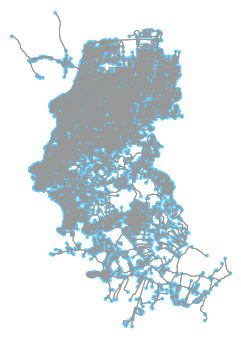

This graph has 35594 nodes and 49831 edges.
This graph has 0 self-loops.


In [11]:
#I am using my hometown as an example, because it is big but not so much that it will cause us trouble
G = ox.graph_from_place('Porto Alegre, Brazil')
G_info = print_info(G)

G_simp = simplify(G)
G_simp_info = print_info(G_simp, False, False)

We see that the number of nodes is preserved, the number of edges is reduced, and zero self-loops remain. Let's check it in a tunnel to see how it behaves:

This graph has 136 nodes and 217 edges.
This graph has 0 self-loops.
The average shortest path length is 7.044771241830065


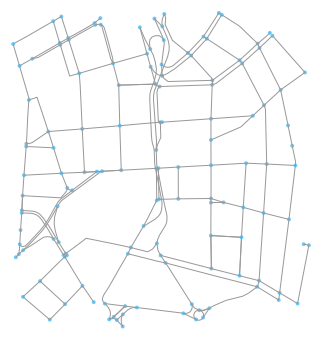

This graph has 136 nodes and 206 edges.
This graph has 0 self-loops.
The average shortest path length is 7.044771241830065


In [12]:
H = ox.graph_from_point((-30.029500, -51.219392), dist=600, network_type='drive')
H_info = print_info(H, path=True)

H_simp = simplify(H)
H_simp_info = print_info(H_simp, False, False, True)

Now we try it in a viaduct:

This graph has 5 nodes and 5 edges.
This graph has 0 self-loops.
The average shortest path length is 1.5


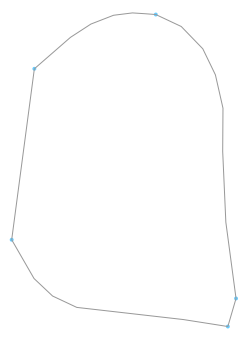

This graph has 5 nodes and 5 edges.
This graph has 0 self-loops.
The average shortest path length is 1.5
3
{(2892720378, 2213097584), (314610444, 2892720378), (4643167632, 314610444)}


In [13]:
F = ox.graph_from_point((-30.059425, -51.230597), dist=100, network_type = 'drive')
F_info = print_info(F, path=True)

F_simp = simplify(F)
F_simp_info = print_info(F_simp, False, False, True)

deleted = set(F.edges()).difference(set(F_simp.edges()))
print(len(deleted))
print(deleted)

The viaduct doesnt appear in here!!! It was renovated recently, so maybe that is the problem---check how old is the data.

This graph has 32 nodes and 80 edges.
This graph has 0 self-loops.
The average shortest path length is 4.252016129032258


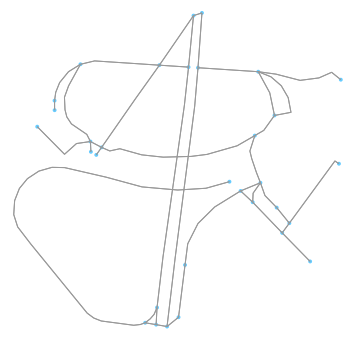

This graph has 32 nodes and 39 edges.
This graph has 0 self-loops.
The average shortest path length is 4.252016129032258


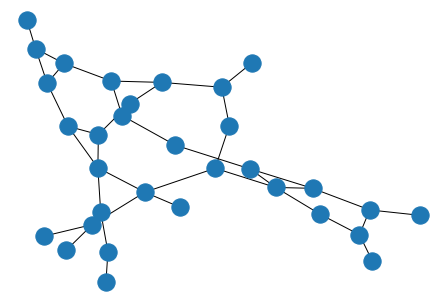

In [14]:
J = ox.graph_from_point((-30.038625, -51.228314), dist=170, network_type = 'walk')
J_info = print_info(J, path=True)

J_simp = simplify(J)
J_simp_info = print_info(J_simp, False, True, True)

In the example above, the viaduct appears, and maybe after asking for networkx to redraw the graph a few times we can even match the nodes from OSMnx to our simplification (the trick is looking for the pentagon attached to a triangle, which in the OSM is in the lower right corner). We see that no significant changes were made, with perhaps the exception of excluding the street on the upper right corner because it is a repeated edge.